<div style="font-size: 24px; font-weight: bold; margin-bottom: 10px; text-decoration: underline;">From unknown data to profession quality graphs</div>

# Subject
> As a data scientist, you are tasked by a newspaper to prepare 3 striking visuals to support an article about youtube 2023 statistics.

**Goal:** During this lab, you will prepare 3 general public data visualization **with** interpretation/story to create a clear and efficient communication tool.

**Topic:** You explore in depth a dataset and design great visuals.

<div class="alert alert-info" role="alert">
  <strong>Find your own dataset (30 minutes max) and present your choice to the instructor before going ahead.</strong>

  <p>
    Browse the internet to find an interesting dataset containing lots of data (> 1KB). For instance, you can browse <a href="https://github.com/awesomedata/awesome-public-datasets" target="_blank" rel="noopener">
      this github repo
    </a>
  </p>
    Or any open/NGO/goverment body dataset.
  <ul>
    <li>
      <a href="https://www.data.gouv.fr/datasets/carte-des-loyers-indicateurs-de-loyers-dannonce-par-commune-en-2025" target="_blank" rel="noopener">
        French Government rental price index
      </a>
    </li>
    <li>
      <a href="https://www.data.gouv.fr/datasets/population" target="_blank" rel="noopener">
        French population dataset
      </a>
    </li>
  </ul>
</div>

**Software:** You will explore data using pandas and plotting tools in this jupyter notebook. For the final version of your graphs, you can use any software you deem fit.

**Duration in class:** 6h (exploration of the data and hand design of the visuals) +2h full class presentation of your work. 

**In this Notebook/Report:**
- Present the dataset and your understanding of it
- Explain what data analysis/exploration you have done. Feel free to manipulate the data and extract/compute information from the set.
- Show inspiration sources you have used (if any)
- Show your draft version(s), including a hand-drawn graph layout for each of your graphs
- Write a storyboard (not a story)
- Describe building steps of each of your visuals
- Save each of your visuals in a separate file for quick review.

**Graph types:**
- One graph has to be a map if the data contains geographical data
- One has to be picked in this list of less common graphs (violin plot, ridge line plot, sankey diagram, heatmap, radial plot, dumbbel plot or scatter with 3 or 4 variables encode)
- Free graph type: check your choice with instructor early on

<div class="alert alert-danger" role="alert">
 Pie charts and simple bar charts / line charts are strictly <b>forbidden</b>. 
</div>

Each type has to deal with a different aspect of the dataset. It is a plus if they form a coherent set.

**Prepare** a storyboard for each graph to be presented to the instructor before the end of Thursday session.

**Remarks:** The visuals may contain subplots, text or any visual cue that will help the reader understand your point!
 
**Grading:**

- **groups of 2 only**
- this has to be original work
- 5/20 is based on your presentation.
- 30% of the total grade

<div class="alert alert-warning" role="alert">
   <b> General remarks about previous years : </b> 
</div>

- Lack of hindsight and understanding of what they were doing e.g. unbelievable values are taken for ground truth. 
- General misinterpretation of the storytelling. No need to write a press article. Just make sure your title (and subtitle) make the graph meaning obvious! 
- Too many simple graphs without proper packaging

# Data exploration

<div class="alert alert-info" role="alert">
    <b> Context: </b> Your first task is to explore the dataset with python libraries starting with pandas and data viz tools such as matplotlib, plotly, seaborn... Feel free to use online ressources for inspiration and code snipets. You will have to present your work, so make sure you understand what you are doing.
    <p>The datasets are not perfect. Make sure the data you're plotting is clean.</p>
</div>

In [1]:
%load_ext autoreload
%autoreload 2

### First, we can clean the data set because, the columns status, lacationSource, magsource, magNst, type, updated, id and net well not be use.

We drop also a line if we have any missing value. Sins we have more than 1800 lines, drop ~100 lines well not distorded the result.

In [34]:
import pandas as pd

# load data
df = pd.read_csv("query-2.csv")
df_old = df.copy() # if needed later for comparison

# filter, drop
cols_to_drop = ["status", "locationSource", "magSource", "magNst", "type", "updated", "id", "net"]
df = df.drop(columns=cols_to_drop, errors="ignore")

# drop rows with all missing value
df = df.dropna()

# (optionnel) reset index
df = df.reset_index(drop=True)

# first 10 rows to have a look
df.head(10)



time  latitude  longitude    depth  mag magType    nst  \
0  2025-12-31T23:52:11.327Z   51.4799   159.4029   45.690  4.3      mb   40.0   
1  2025-12-31T23:04:28.213Z   51.3484   159.7882   13.223  4.6      mb   82.0   
2  2025-12-31T22:09:55.441Z   -7.1001   129.3331  171.476  4.3      mb   23.0   
3  2025-12-31T20:36:21.785Z   60.0480  -152.7710  101.200  4.0      ml  221.0   
4  2025-12-31T20:27:43.684Z   51.3600   159.7160   10.000  4.9      mb  103.0   
5  2025-12-31T18:44:42.508Z  -16.4461  -175.3776  235.071  4.2      mb   15.0   
6  2025-12-31T17:31:38.869Z   39.6645   143.5334   30.009  4.3      mb   30.0   
7  2025-12-31T17:30:44.036Z   40.1109   142.8847   39.648  4.2      mb   27.0   
8  2025-12-31T17:30:37.872Z    7.3549   126.9864   28.381  4.6      mb   79.0   
9  2025-12-31T16:56:59.040Z    9.6143   126.1051   94.532  4.3      mb   16.0   

     gap   dmin   rms                              place  horizontalError  \
0  135.0  1.938  0.71  175 km SSE of Vilyuchinsk, Russia             7.79   
1  128.0  2.181  0.88  199 km SSE of Vilyuchinsk, Russia             8.86   
2   72.0  2.623  0.82         Kepulauan Babar, Indonesia             9.63   
3   65.0  0.100  0.90    59 km W of Happy Valley, Alaska             0.00   
4  111.0  2.146  0.81  196 km SSE of Vilyuchinsk, Russia             8.43   
5  156.0  4.291  0.46        177 km WSW of Hihifo, Tonga             9.18   
6  142.0  2.199  1.00          136 km E of Miyako, Japan             8.21   
7  174.0  1.545  0.82             90 km E of Noda, Japan             8.42   
8   41.0  1.425  1.32  45 km ESE of Baculin, Philippines             7.39   
9  135.0  2.581  1.20    15 km E of Socorro, Philippines            13.99   

   depthError  magError  
0      7.1440     0.099  
1      4.9360     0.067  
2      9.7580     0.129  
3      1.3054     0.300  
4      1.8480     0.058  
5     14.8220     0.153  
6      5.1870     0.137  
7      9.2220     0.153  
8      4.2310     0.068  
9      7.1700     0.161

In [39]:
df.info()
dif = df_old.shape[0] - df.shape[0]
print (f"\n Number of rows dropped: {dif}")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18166 entries, 0 to 18165
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   time             18166 non-null  object 
 1   latitude         18166 non-null  float64
 2   longitude        18166 non-null  float64
 3   depth            18166 non-null  float64
 4   mag              18166 non-null  float64
 5   magType          18166 non-null  object 
 6   nst              18166 non-null  float64
 7   gap              18166 non-null  float64
 8   dmin             18166 non-null  float64
 9   rms              18166 non-null  float64
 10  place            18166 non-null  object 
 11  horizontalError  18166 non-null  float64
 12  depthError       18166 non-null  float64
 13  magError         18166 non-null  float64
dtypes: float64(11), object(3)
memory usage: 1.9+ MB

 Number of rows dropped: 103


### Sins we have a clean data set, we can start the exploration.

In [27]:

df.shape

(18166, 14)

# Storyboard and hand-drawn blueprint

<div class="alert alert-info" role="alert">
    <b> In this section : </b> 
you explain what you have observed in the dataset and how you plan to communicate these findings to a general audience. You will provide a drawing of your expected graph. Handover your sketch on hippocampus by the end of the first session.
</div>

# Building the final graphs.

<div class="alert alert-info" role="alert">
    <b> Publication ready graph</b> 
The graphs have to be self contained figures. By reading them, the audience should know what they are looking at, how to interpret it and be able to comfort their understanding with the data shown.

Your work will be presented to the class on 12th Feb. 5 mins per group.
</div>

In [1]:
# === Setup (run once) ===
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm

# Read CSV
df = pd.read_csv("query-2.csv")

# Parse times
df["time"] = pd.to_datetime(df["time"], utc=True, errors="coerce")
df["updated"] = pd.to_datetime(df.get("updated", pd.NaT), utc=True, errors="coerce")

# Basic cleaning
num_cols = ["latitude","longitude","depth","mag","nst","gap","dmin","rms",
            "horizontalError","depthError","magError","magNst"]
for c in num_cols:
    if c in df.columns:
        df[c] = pd.to_numeric(df[c], errors="coerce")

df = df.dropna(subset=["time","latitude","longitude","depth","mag"]).copy()
df = df.sort_values("time").reset_index(drop=True)

# Useful derived fields
df["date"] = df["time"].dt.date
df["year"] = df["time"].dt.year
df["month"] = df["time"].dt.month
df["month_start"] = df["time"].dt.to_period("M").dt.to_timestamp()


C:\Users\corio\AppData\Local\Temp\ipykernel_11152\1185379755.py:28: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  df["month_start"] = df["time"].dt.to_period("M").dt.to_timestamp()


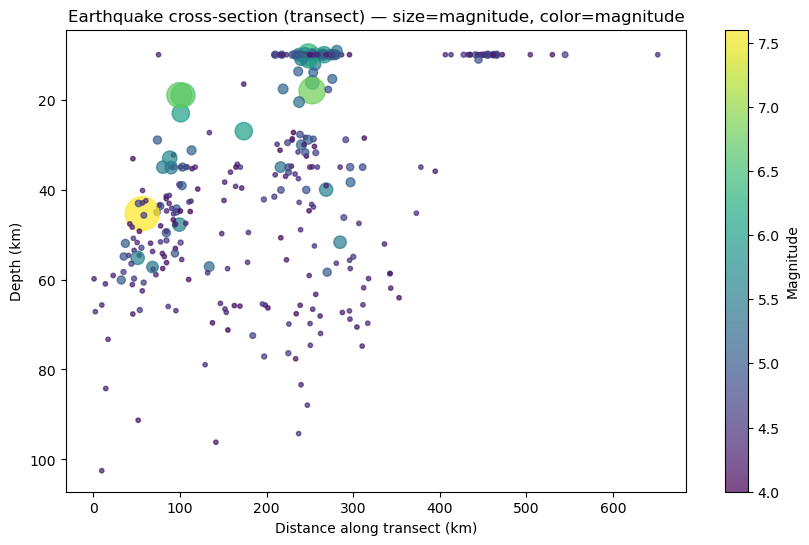

In [2]:
# === Helpers for transect ===
def haversine_km(lat1, lon1, lat2, lon2):
    R = 6371.0
    lat1, lon1, lat2, lon2 = map(np.radians, [lat1, lon1, lat2, lon2])
    dlat = lat2 - lat1
    dlon = lon2 - lon1
    a = np.sin(dlat/2)**2 + np.cos(lat1)*np.cos(lat2)*np.sin(dlon/2)**2
    return 2*R*np.arcsin(np.sqrt(a))

def bearing_rad(lat1, lon1, lat2, lon2):
    lat1, lon1, lat2, lon2 = map(np.radians, [lat1, lon1, lat2, lon2])
    dlon = lon2 - lon1
    y = np.sin(dlon) * np.cos(lat2)
    x = np.cos(lat1)*np.sin(lat2) - np.sin(lat1)*np.cos(lat2)*np.cos(dlon)
    return np.arctan2(y, x)

def along_cross_track_km(lat, lon, latA, lonA, latB, lonB):
    # Spherical approximation: along-track and cross-track distances to great-circle AB
    R = 6371.0
    latA_r, lonA_r = np.radians([latA, lonA])
    latB_r, lonB_r = np.radians([latB, lonB])
    lat_r = np.radians(lat)
    lon_r = np.radians(lon)

    d13 = haversine_km(latA, lonA, lat, lon) / R  # angular
    th13 = bearing_rad(latA, lonA, lat, lon)
    th12 = bearing_rad(latA, lonA, latB, lonB)

    # cross-track angular distance
    dxt = np.arcsin(np.sin(d13) * np.sin(th13 - th12))
    # along-track angular distance
    dat = np.arctan2(np.sin(d13)*np.cos(th13 - th12), np.cos(d13))

    return dat*R, dxt*R

# === Choose a transect (example: Japan region) ===
# You can change these endpoints.
A = (41.0, 141.0)   # (lat, lon)
B = (35.0, 146.0)

# Band width around transect (km)
band_km = 150

# Optional: prefilter region bounding box to speed things up
sub = df[
    (df["latitude"].between(min(A[0], B[0]) - 5, max(A[0], B[0]) + 5)) &
    (df["longitude"].between(min(A[1], B[1]) - 5, max(A[1], B[1]) + 5))
].copy()

along, cross = along_cross_track_km(sub["latitude"].values, sub["longitude"].values, A[0], A[1], B[0], B[1])
sub["dist_along_km"] = along
sub["dist_cross_km"] = cross

# Keep points near the transect band and between endpoints (0..AB length)
AB_len = haversine_km(A[0], A[1], B[0], B[1])
sub = sub[(sub["dist_cross_km"].abs() <= band_km) & (sub["dist_along_km"].between(0, AB_len))].copy()

plt.figure(figsize=(10,6))
sizes = np.clip((sub["mag"] - sub["mag"].min() + 0.5) ** 3 * 10, 10, 600)
sc = plt.scatter(sub["dist_along_km"], sub["depth"], s=sizes, c=sub["mag"], alpha=0.7)
plt.gca().invert_yaxis()
plt.colorbar(sc, label="Magnitude")
plt.xlabel("Distance along transect (km)")
plt.ylabel("Depth (km)")
plt.title("Earthquake cross-section (transect) — size=magnitude, color=magnitude")
plt.show()


In [9]:
# If you don't have plotly: pip install plotly
import plotly.express as px

dmap = df.copy()
dmap["t"] = dmap["time"].dt.strftime("%Y-%m-%d")  # animation frame (daily)
dmap["mag_size"] = np.clip((dmap["mag"] - dmap["mag"].min() + 0.3) * 6, 2, 30)

fig = px.scatter_geo(
    dmap,
    lat="latitude", lon="longitude",
    color="depth",
    size="mag_size",
    hover_name="place",
    hover_data={"mag":":.2f", "depth":":.1f", "t":True, "mag_size":False},
    animation_frame="t",
    projection="natural earth",
    title="Earthquakes over time (size~magnitude, color~depth)"
)
fig.update_layout(height=600)
fig.show()


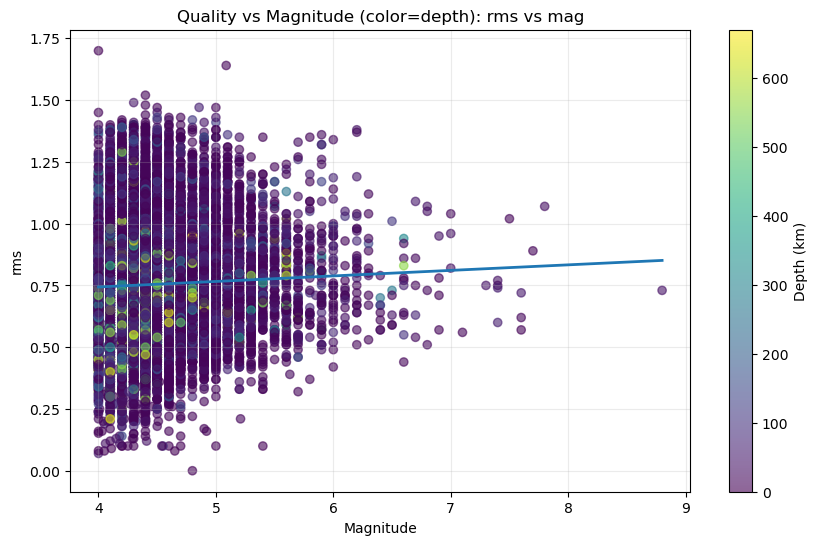

In [6]:
# Choose which quality metric exists in your data:
metric = "rms" if "rms" in df.columns else ("gap" if "gap" in df.columns else None)
if metric is None:
    raise ValueError("No quality metric found (expected rms or gap).")

sub = df.dropna(subset=[metric]).copy()

plt.figure(figsize=(10,6))
sc = plt.scatter(sub["mag"], sub[metric], c=sub["depth"], alpha=0.6)
plt.colorbar(sc, label="Depth (km)")
plt.xlabel("Magnitude")
plt.ylabel(metric)
plt.title(f"Quality vs Magnitude (color=depth): {metric} vs mag")

# Optional trend line (simple)
x = sub["mag"].values
y = sub[metric].values
mask = np.isfinite(x) & np.isfinite(y)
if mask.sum() > 2:
    coef = np.polyfit(x[mask], y[mask], 1)
    xs = np.linspace(x[mask].min(), x[mask].max(), 100)
    plt.plot(xs, coef[0]*xs + coef[1], linewidth=2)

plt.grid(True, alpha=0.25)
plt.show()
